In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model # pip install --upgrade numpy

In [5]:
df = pd.read_csv("D:/4th year/Machine Learning/Practice/hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [7]:
df.rename(columns={"test_score(out of 10)":"test_score","interview_score(out of 10)":"interview_score", "salary($)":"salary"}, inplace=True)
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [9]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
from word2number import w2n #pip install word2number
df['experience'] = df['experience'].astype(str)
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [22]:
a = df['test_score'].mean() #df.dropna()
df['test_score'].fillna(a, inplace=True)
df

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [26]:
x = df.iloc[:,0:-1]
y = df.iloc[:, -1]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [32]:
Y_predict = lr.predict(X_test)
print(Y_predict)
print(Y_test)

[77818.23189204 57496.5574222 ]
6    72000
2    60000
Name: salary, dtype: int64


In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(Y_test, Y_predict)*100

mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse

4478.785945427261

In [44]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 4160.837234921513
Mean Squared Error (MSE): 20059523.544956766
Root Mean Squared Error (RMSE): 4478.785945427261


Text(0, 0.5, 'Predicted Values')

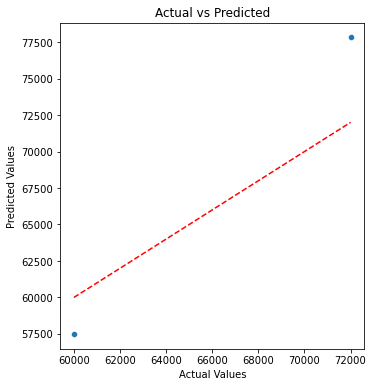

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# 1. Scatter plot of Actual vs Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_test, y=Y_predict)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle="--", color='red')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")